In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
white_wine=pd.read_csv('../../practice/winequality-white.csv', sep=';')
red_wine=pd.read_csv('../../practice/winequality-red.csv', sep=';')
white_wine.columns=white_wine.columns.str.replace(' ','_')
red_wine.columns=red_wine.columns.str.replace(' ','_')
white_wine['wine_type']=0
red_wine['wine_type']=1
red_wine['wine_type'].astype('int64')
total_wine=pd.concat([white_wine, red_wine])

In [68]:
print(total_wine.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [69]:
total_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                 int64
dtype: object

In [70]:
# sI use z score method to remove outliers
def outliers_remov(df):
    df_out=df.copy()
    for colu in total_wine:
        per95_df=df[colu].quantile(0.95)
        per5_df=df[colu].quantile(0.05)
        df_out[colu]=np.where(df[colu] >  per95_df,
        per95_df, df[colu])   
        df_out[colu]=np.where(df_out[colu] <  per5_df,
        per5_df, df_out[colu])       
        df=df_out     
    return df_out



total_wine=outliers_remov(total_wine)
total_wine= total_wine.set_index(np.arange(len(total_wine)))

score :
 0.9945128205128204 
cohen: 
 0.9852031569717734 
confusion 
 [array([[1460,    4],
       [   5,  481]]), array([[1485,    3],
       [   4,  458]]), array([[1455,    2],
       [   6,  487]]), array([[1470,    9],
       [   4,  467]]), array([[1478,    7],
       [   6,  459]]), array([[1455,    5],
       [   7,  483]]), array([[1455,   10],
       [   1,  484]]), array([[1454,   10],
       [   3,  483]]), array([[1459,    3],
       [   8,  480]]), array([[1481,    6],
       [   4,  459]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      1464\n         1.0       0.99      0.99      0.99       486\n\n    accuracy                           1.00      1950\n   macro avg       0.99      0.99      0.99      1950\nweighted avg       1.00      1.00      1.00      1950\n', '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      1488\n         1.0       

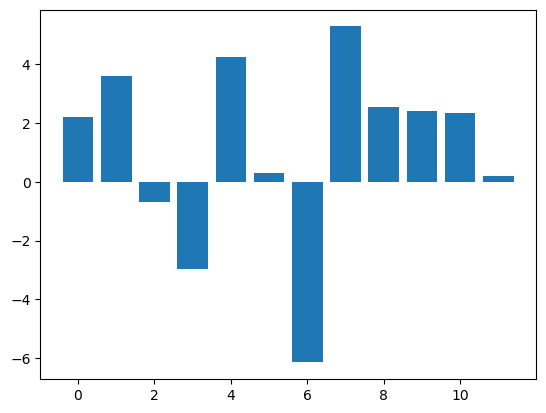

In [71]:
# feature importance for LogisticRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=LogisticRegression()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
importance = model.coef_[0]
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %5d, Score: %0.4f' %(i, v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

score :
 0.9851794871794872 
cohen: 
 0.9597591744541806 
confusion 
 [array([[1469,   15],
       [   6,  460]]), array([[1453,   20],
       [  18,  459]]), array([[1451,   14],
       [  13,  472]]), array([[1474,   10],
       [  16,  450]]), array([[1462,   17],
       [  13,  458]]), array([[1462,   18],
       [  13,  457]]), array([[1461,   15],
       [  11,  463]]), array([[1446,   16],
       [  16,  472]]), array([[1458,    8],
       [  20,  464]]), array([[1475,    9],
       [  21,  445]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      0.99      1484\n         1.0       0.97      0.99      0.98       466\n\n    accuracy                           0.99      1950\n   macro avg       0.98      0.99      0.99      1950\nweighted avg       0.99      0.99      0.99      1950\n', '              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99      1473\n         1.0       

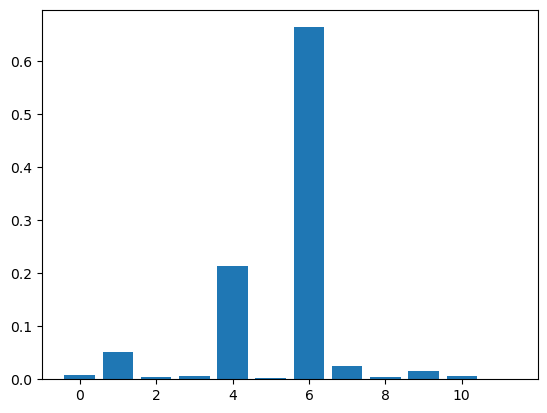

In [72]:
# feature importance of Decision Tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=DecisionTreeClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
importance=model.feature_importances_
for i, v in enumerate(importance):
    print('Feature : %5d , importance %0.5f' %(i,v) )
plt.bar([x for x in range(len(importance))], importance)
plt.show()

score :
 0.9945641025641028 
cohen: 
 0.9852335313477546 
confusion 
 [array([[1470,    2],
       [  10,  468]]), array([[1468,    1],
       [  10,  471]]), array([[1481,    2],
       [   5,  462]]), array([[1472,    1],
       [  13,  464]]), array([[1478,    1],
       [   2,  469]]), array([[1460,    1],
       [  15,  474]]), array([[1464,    4],
       [   6,  476]]), array([[1475,    5],
       [  11,  459]]), array([[1474,    3],
       [   5,  468]]), array([[1466,    2],
       [   7,  475]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       0.99      1.00      1.00      1472\n         1.0       1.00      0.98      0.99       478\n\n    accuracy                           0.99      1950\n   macro avg       0.99      0.99      0.99      1950\nweighted avg       0.99      0.99      0.99      1950\n', '              precision    recall  f1-score   support\n\n         0.0       0.99      1.00      1.00      1469\n         1.0       

<BarContainer object of 12 artists>

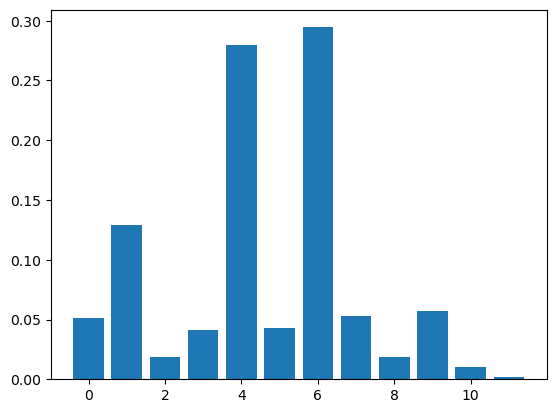

In [73]:
# Feature importance for random forest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=RandomForestClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
importance=model.feature_importances_
for i,v in enumerate(importance):
    print('Feature : %5d , importance : %0.5f' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

score :
 0.9945128205128206 
cohen: 
 0.9851885212573087 
confusion 
 [array([[1465,    2],
       [   6,  477]]), array([[1492,    2],
       [   5,  451]]), array([[1488,    4],
       [  11,  447]]), array([[1457,    3],
       [  10,  480]]), array([[1491,    2],
       [  10,  447]]), array([[1440,    2],
       [   7,  501]]), array([[1438,    3],
       [   7,  502]]), array([[1466,    2],
       [   8,  474]]), array([[1467,    2],
       [   8,  473]]), array([[1441,    6],
       [   7,  496]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      1467\n         1.0       1.00      0.99      0.99       483\n\n    accuracy                           1.00      1950\n   macro avg       1.00      0.99      0.99      1950\nweighted avg       1.00      1.00      1.00      1950\n', '              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      1494\n         1.0       

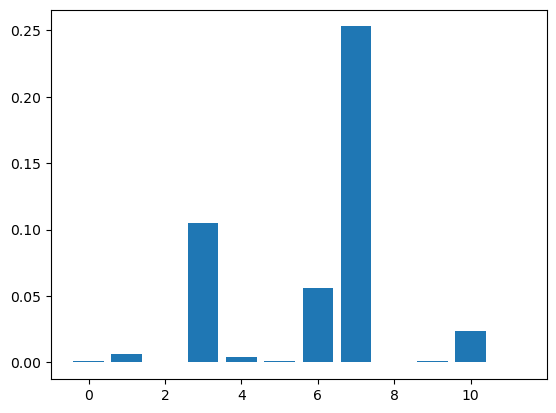

In [74]:
# Feature importace for LinearDiscriminantAnalysis . This can be used for other models like knn ,..
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=LinearDiscriminantAnalysis()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
res = permutation_importance(model, x_train_n, y_train, scoring='accuracy')
importance = res.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

score :
 0.9927179487179488 
cohen: 
 0.9802638107905084 
confusion 
 [array([[1450,    6],
       [  13,  481]]), array([[1481,    7],
       [   9,  453]]), array([[1445,    2],
       [  11,  492]]), array([[1475,    4],
       [  13,  458]]), array([[1492,    6],
       [  10,  442]]), array([[1479,    3],
       [  11,  457]]), array([[1449,    5],
       [   6,  490]]), array([[1465,    3],
       [   8,  474]]), array([[1451,    4],
       [   7,  488]]), array([[1464,    7],
       [   7,  472]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       0.99      1.00      0.99      1456\n         1.0       0.99      0.97      0.98       494\n\n    accuracy                           0.99      1950\n   macro avg       0.99      0.98      0.99      1950\nweighted avg       0.99      0.99      0.99      1950\n', '              precision    recall  f1-score   support\n\n         0.0       0.99      1.00      0.99      1488\n         1.0       

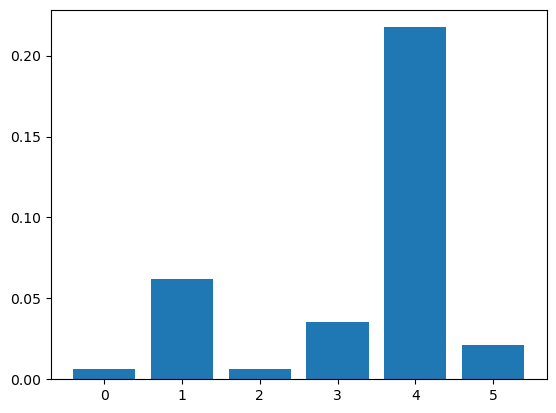

In [75]:
# removing Features based on feature importace for LinearDiscriminantAnalysis . This can be used for other models like knn ,..
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=LinearDiscriminantAnalysis()
    x=total_wine.drop(columns=['fixed_acidity','citric_acid','free_sulfur_dioxide','pH','sulphates','quality','wine_type'])
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
res = permutation_importance(model, x_train_n, y_train, scoring='accuracy')
importance = res.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

score :
 0.9929230769230768 
cohen: 
 0.9810099511984944 
confusion 
 [array([[1454,    9],
       [   7,  480]]), array([[1468,    8],
       [   3,  471]]), array([[1457,    6],
       [  10,  477]]), array([[1444,    3],
       [   7,  496]]), array([[1465,    7],
       [  11,  467]]), array([[1443,    7],
       [   7,  493]]), array([[1454,    7],
       [   5,  484]]), array([[1485,    7],
       [   6,  452]]), array([[1459,    3],
       [  13,  475]]), array([[1466,    6],
       [   6,  472]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      0.99      1463\n         1.0       0.98      0.99      0.98       487\n\n    accuracy                           0.99      1950\n   macro avg       0.99      0.99      0.99      1950\nweighted avg       0.99      0.99      0.99      1950\n', '              precision    recall  f1-score   support\n\n         0.0       1.00      0.99      1.00      1476\n         1.0       

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

Feature :     0 , importance 0.00652 
Feature :     1 , importance 0.02143 
Feature :     2 , importance 0.00296 
Feature :     3 , importance 0.02261 
Feature :     4 , importance 0.03608 
Feature :     5 , importance 0.00281 
Feature :     6 , importance 0.05664 
Feature :     7 , importance 0.01913 
Feature :     8 , importance 0.01104 
Feature :     9 , importance 0.01121 
Feature :    10 , importance 0.00288 
Feature :    11 , importance 0.00355 


/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<BarContainer object of 12 artists>

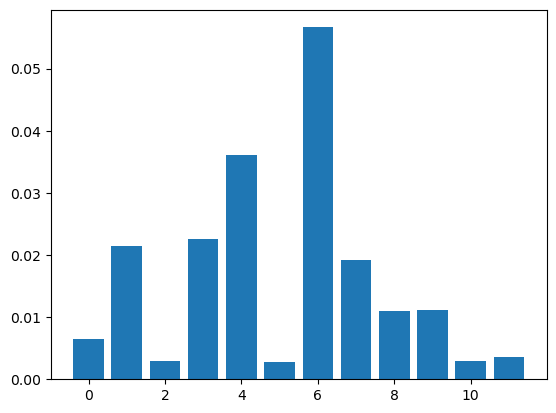

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=KNeighborsClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
res=permutation_importance(model, x_train_n,y_train, scoring='f1')
importance=res.importances_mean
for i, v in enumerate(importance):
    print('Feature : %5d , importance %0.5f ' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

score :
 0.9843589743589745 
cohen: 
 0.9575074859769718 
confusion 
 [array([[1445,   14],
       [  25,  466]]), array([[1464,   16],
       [  12,  458]]), array([[1448,   14],
       [  18,  470]]), array([[1479,   11],
       [  19,  441]]), array([[1457,    8],
       [  23,  462]]), array([[1478,   12],
       [  12,  448]]), array([[1472,   13],
       [  17,  448]]), array([[1433,   18],
       [  13,  486]]), array([[1479,   12],
       [  15,  444]]), array([[1456,   18],
       [  15,  461]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       0.98      0.99      0.99      1459\n         1.0       0.97      0.95      0.96       491\n\n    accuracy                           0.98      1950\n   macro avg       0.98      0.97      0.97      1950\nweighted avg       0.98      0.98      0.98      1950\n', '              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99      1480\n         1.0       

<BarContainer object of 12 artists>

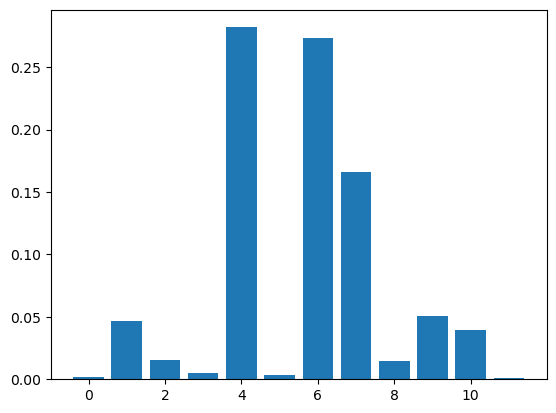

In [77]:
# Although decision tree has own feature_importance, but permutation can also be used for it (results of both show almost similar outcomes)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=DecisionTreeClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
res=permutation_importance(model, x_train_n,y_train, scoring='f1')
importance=res.importances_mean
for i, v in enumerate(importance):
    print('Feature : %5d , importance %0.5f ' %(i,v))
plt.bar([x for x in range(len(importance))], importance)

score :
 0.9854871794871796 
cohen: 
 0.9612754376336413 
confusion 
 [array([[1455,   21],
       [  14,  460]]), array([[1444,   13],
       [   8,  485]]), array([[1437,   10],
       [  15,  488]]), array([[1473,   17],
       [   9,  451]]), array([[1465,   16],
       [   9,  460]]), array([[1443,   15],
       [  20,  472]]), array([[1461,   15],
       [  10,  464]]), array([[1430,   20],
       [  11,  489]]), array([[1436,   17],
       [  12,  485]]), array([[1442,   17],
       [  14,  477]])] classification: 
 ['              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99      1476\n         1.0       0.96      0.97      0.96       474\n\n    accuracy                           0.98      1950\n   macro avg       0.97      0.98      0.98      1950\nweighted avg       0.98      0.98      0.98      1950\n', '              precision    recall  f1-score   support\n\n         0.0       0.99      0.99      0.99      1457\n         1.0       

<BarContainer object of 7 artists>

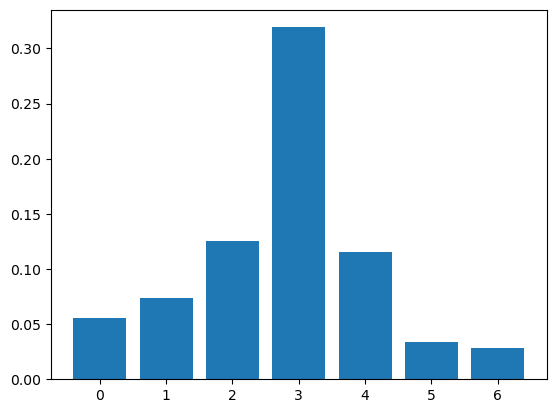

In [78]:
# Although decision tree has own feature_importance, but permutation can also be used for it (results of both show almost similar outcomes)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=DecisionTreeClassifier()
    x=total_wine.drop(columns=['fixed_acidity','citric_acid','free_sulfur_dioxide','pH','quality','wine_type'])
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)
res=permutation_importance(model, x_train_n,y_train, scoring='f1')
importance=res.importances_mean
for i, v in enumerate(importance):
    print('Feature : %5d , importance %0.5f ' %(i,v))
plt.bar([x for x in range(len(importance))], importance)


In [79]:
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


cohen=[]
score=[]
confusion=[]
class_out=[]
for i in range(10): 
    model=XGBClassifier()
    x=total_wine.drop(columns='wine_type')
    y=total_wine['wine_type']
    x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
    scale=MinMaxScaler()
    x_train_n= scale.fit_transform(x_train)
    x_train_n= pd.DataFrame(x_train_n, columns=x_train.columns)
    x_test_n= scale.fit_transform(x_test)
    x_test_n= pd.DataFrame(x_test_n, columns=x_test.columns)
    model.fit(x_train_n, y_train)
    pred=model.predict(x_test_n)
    scor=accuracy_score(pred, y_test)
    score.append(scor)

    con=confusion_matrix(y_test, pred)
    confusion.append(con)
    class_p= classification_report(y_test,pred)
    class_out.append(class_p)
    cohe=cohen_kappa_score(y_test, pred)
    cohen.append(cohe)
    i +=1
print('score :\n', np.mean(score),'\ncohen: \n',np.mean(cohen),'\nconfusion \n',confusion, 'classification: \n',class_out)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# to check how normalisation, standardization affect the model results:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

model=LogisticRegression()
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=StandardScaler()
x_train_stand= scale.fit_transform(x_train)
x_train_stand= pd.DataFrame(x_train_stand, columns=x_train.columns)
x_test_stand= scale.fit_transform(x_test)
x_test_stand= pd.DataFrame(x_test_stand, columns=x_test.columns)
scale=MinMaxScaler()
x_train_norm= scale.fit_transform(x_train)
x_train_norm= pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test_norm= scale.fit_transform(x_test)
x_test_norm= pd.DataFrame(x_test_norm, columns=x_test.columns)
rmse = []

# raw, normalized and standardized training and testing data
trainX = [x_train, x_train_norm, x_train_stand]
testX = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    model.fit(trainX[i],y_train)
    # predict
    pred = model.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

/Users/marziehbaes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,RMSE
Original,0.151911
Normalized,0.087706
Standardized,0.087706


In [ ]:
# to check how normalisation, standardization affect the model results:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

model=LinearDiscriminantAnalysis()
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=StandardScaler()
x_train_stand= scale.fit_transform(x_train)
x_train_stand= pd.DataFrame(x_train_stand, columns=x_train.columns)
x_test_stand= scale.fit_transform(x_test)
x_test_stand= pd.DataFrame(x_test_stand, columns=x_test.columns)
scale=MinMaxScaler()
x_train_norm= scale.fit_transform(x_train)
x_train_norm= pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test_norm= scale.fit_transform(x_test)
x_test_norm= pd.DataFrame(x_test_norm, columns=x_test.columns)
rmse = []

# raw, normalized and standardized training and testing data
trainX = [x_train, x_train_norm, x_train_stand]
testX = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    model.fit(trainX[i],y_train)
    # predict
    pred = model.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,0.071611
Normalized,0.071611
Standardized,0.078446


In [ ]:
# to check how normalisation, standardization affect the model results:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

model=SVC()
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3)
scale=StandardScaler()
x_train_stand= scale.fit_transform(x_train)
x_train_stand= pd.DataFrame(x_train_stand, columns=x_train.columns)
x_test_stand= scale.fit_transform(x_test)
x_test_stand= pd.DataFrame(x_test_stand, columns=x_test.columns)
scale=MinMaxScaler()
x_train_norm= scale.fit_transform(x_train)
x_train_norm= pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test_norm= scale.fit_transform(x_test)
x_test_norm= pd.DataFrame(x_test_norm, columns=x_test.columns)
rmse = []

# raw, normalized and standardized training and testing data
trainX = [x_train, x_train_norm, x_train_stand]
testX = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    model.fit(trainX[i],y_train)
    # predict
    pred = model.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,0.261161
Normalized,0.045291
Standardized,0.050637


In [ ]:
# to check how normalisation, standardization affect the model results:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

model=RandomForestClassifier()
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3,,random_state=42, shuffle=True)
scale=StandardScaler()
x_train_stand= scale.fit_transform(x_train)
x_train_stand= pd.DataFrame(x_train_stand, columns=x_train.columns)
x_test_stand= scale.fit_transform(x_test)
x_test_stand= pd.DataFrame(x_test_stand, columns=x_test.columns)
scale=MinMaxScaler()
x_train_norm= scale.fit_transform(x_train)
x_train_norm= pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test_norm= scale.fit_transform(x_test)
x_test_norm= pd.DataFrame(x_test_norm, columns=x_test.columns)
rmse = []

# raw, normalized and standardized training and testing data
trainX = [x_train, x_train_norm, x_train_stand]
testX = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    model.fit(trainX[i],y_train)
    # predict
    pred = model.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

SyntaxError: invalid syntax (2615250151.py, line 13)

In [ ]:
# to check how normalisation, standardization affect the model results:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

model=DecisionTreeClassifier()
x=total_wine.drop(columns='wine_type')
y=total_wine['wine_type']
x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=42, shuffle=True)
scale=StandardScaler()
x_train_stand= scale.fit_transform(x_train)
x_train_stand= pd.DataFrame(x_train_stand, columns=x_train.columns)
x_test_stand= scale.fit_transform(x_test)
x_test_stand= pd.DataFrame(x_test_stand, columns=x_test.columns)
scale=MinMaxScaler()
x_train_norm= scale.fit_transform(x_train)
x_train_norm= pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test_norm= scale.fit_transform(x_test)
x_test_norm= pd.DataFrame(x_test_norm, columns=x_test.columns)
rmse = []

# raw, normalized and standardized training and testing data
trainX = [x_train, x_train_norm, x_train_stand]
testX = [x_test, x_test_norm, x_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    model.fit(trainX[i],y_train)
    # predict
    pred = model.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,0.121950
Normalized,0.248069
Standardized,0.119829
